In [ ]:
import pandas as pd

In [ ]:
# Load the data from the uploaded CSV files
parliament_results = pd.read_csv('/content/Parliament_election_results.csv')
andhra_pradesh_results = pd.read_csv('/content/AndhraPradesh_election_results.csv')


In [ ]:


parliament_results.head()


,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22


In [ ]:
andhra_pradesh_results.head()

,Party,Won,Leading,Total
0,Telugu Desam - TDP,135,0,135
1,Janasena Party - JnP,21,0,21
2,Yuvajana Sramika Rythu Congress Party - YSRCP,11,0,11
3,Bharatiya Janata Party - BJP,8,0,8


In [ ]:
# Parliament Election Results Analysis
total_seats_parliament = parliament_results['Total'].sum()
parliament_results['Seat Share (%)'] = (parliament_results['Total'] / total_seats_parliament) * 100


In [ ]:
parliament_results

,Party,Won,Leading,Total,Seat Share (%)
0,Bharatiya Janata Party - BJP,240,0,240,44.198895
1,Indian National Congress - INC,99,0,99,18.232044
2,Samajwadi Party - SP,37,0,37,6.813996
3,All India Trinamool Congress - AITC,29,0,29,5.340700
4,Dravida Munnetra Kazhagam - DMK,22,0,22,4.051565
5,Telugu Desam - TDP,16,0,16,2.946593
6,Janata Dal (United) - JD(U),12,0,12,2.209945
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9,1.657459
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8,1.473297
9,Shiv Sena - SHS,7,0,7,1.289134


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Parliament Election Results Analysis
total_seats_parliament = parliament_results['Total'].sum()
parliament_results['Seat Share (%)'] = (parliament_results['Total'] / total_seats_parliament) * 100

# Identify the top 12 parties by seats
top_12_parties = parliament_results.nlargest(12, 'Total')
remaining_parties = parliament_results[~parliament_results['Party'].isin(top_12_parties['Party'])]

# Combine remaining parties into a single 'Other' category
other_seat_share = remaining_parties['Seat Share (%)'].sum()
other_total_seats = remaining_parties['Total'].sum()
other_row = pd.DataFrame([['Other', other_total_seats, 0, other_total_seats, other_seat_share]], columns=parliament_results.columns)

# Create a new DataFrame with the top 12 parties and the 'Other' category
top_12_with_other = pd.concat([top_12_parties, other_row], ignore_index=True)

# Data for plotting
data = top_12_with_other['Seat Share (%)']
parties = top_12_with_other['Party']

# Define colors for the pie chart
colors = list(plt.cm.tab20.colors)[:12]  # Unique colors for top 12 parties
colors.append('#808080')  # Add gray color for 'Other'

# Create the pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=parties, values=data, hoverinfo='label+percent', textinfo='none', marker=dict(colors=colors))])

# Update the layout for better visualization
fig.update_layout(
    title="Parliament Election Results - Party Seat Shares",
    legend_title="Parties",
    legend=dict(yanchor="top", y=0.9, xanchor="left", x=1.05)
)

# Display the chart
fig.show()


In [ ]:
# Identify the top 20 parties by seats
top_20_parties = parliament_results.nlargest(20, 'Total')
remaining_parties = parliament_results[~parliament_results['Party'].isin(top_20_parties['Party'])]

# Combine remaining parties into a single 'Other' category
other_seat_share = remaining_parties['Seat Share (%)'].sum()
other_total_seats = remaining_parties['Total'].sum()
other_row = pd.DataFrame([['Other', other_total_seats, 0, other_total_seats, other_seat_share]], columns=parliament_results.columns)

# Create a new DataFrame with the top 20 parties and the 'Other' category
top_20_with_other = pd.concat([top_20_parties, other_row], ignore_index=True)

# Data for plotting
data = top_20_with_other['Seat Share (%)']
parties = top_20_with_other['Party']

# Define colors for the bar chart
colors = plt.cm.tab20.colors[:len(parties)]

# Create the bar chart using Plotly
fig = go.Figure(data=[go.Bar(
    x=parties,
    y=data,
    marker_color=colors,
    text=data,
    textposition='auto',
    hovertemplate='<b>%{x}</b><br>Seat Share: %{y:.2f}%<extra></extra>'
)])

# Update the layout for better visualization
fig.update_layout(
    title="Parliament Election Results - Party Seat Shares(Top 20)",
    xaxis_title="",
    yaxis_title="Seat Share (%)",
    xaxis=dict(showticklabels=False),  # Hide x-axis labels
    yaxis=dict(tickformat=".1f"),
    bargap=0.2,
    plot_bgcolor='rgba(0,0,0,0)',
    height=800,  # Further increased the height for better visibility
    margin=dict(l=50, r=50, t=50, b=100)  # Adjusted margin
)

# Display the chart
fig.show()

## Andhra Pradesh

In [ ]:
remaining_parties = parliament_results[~parliament_results['Party'].isin(top_20_parties['Party'])]

# Data for plotting
data_remaining = remaining_parties['Seat Share (%)']
parties_remaining = remaining_parties['Party']

# Define colors for the bar chart
colors_remaining = plt.cm.tab20.colors[:len(parties_remaining)]

# Create the bar chart using Plotly for the remaining parties
fig_remaining = go.Figure(data=[go.Bar(
    x=parties_remaining,
    y=data_remaining,
    marker_color=colors_remaining,
    text=data_remaining,
    textposition='auto',
    hovertemplate='<b>%{x}</b><br>Seat Share: %{y:.2f}%<extra></extra>'
)])

# Update the layout for better visualization
fig_remaining.update_layout(
    title="Parliament Election Results - Remaining Party Seat Shares",
    xaxis_title="",
    yaxis_title="Seat Share (%)",
    xaxis=dict(showticklabels=False),  # Hide x-axis labels
    yaxis=dict(tickformat=".1f"),
    bargap=0.2,
    plot_bgcolor='rgba(0,0,0,0)',
    height=800,  # Further increased the height for better visibility
    margin=dict(l=50, r=50, t=50, b=100)  # Adjusted margin
)

# Display the chart
fig_remaining.show()

In [ ]:
# Andhra Pradesh Election Results Analysis
total_seats_ap = andhra_pradesh_results['Total'].sum()
andhra_pradesh_results['Seat Share (%)'] = (andhra_pradesh_results['Total'] / total_seats_ap) * 100


In [ ]:
andhra_pradesh_results

,Party,Won,Leading,Total,Seat Share (%)
0,Telugu Desam - TDP,135,0,135,77.142857
1,Janasena Party - JnP,21,0,21,12.000000
2,Yuvajana Sramika Rythu Congress Party - YSRCP,11,0,11,6.285714
3,Bharatiya Janata Party - BJP,8,0,8,4.571429


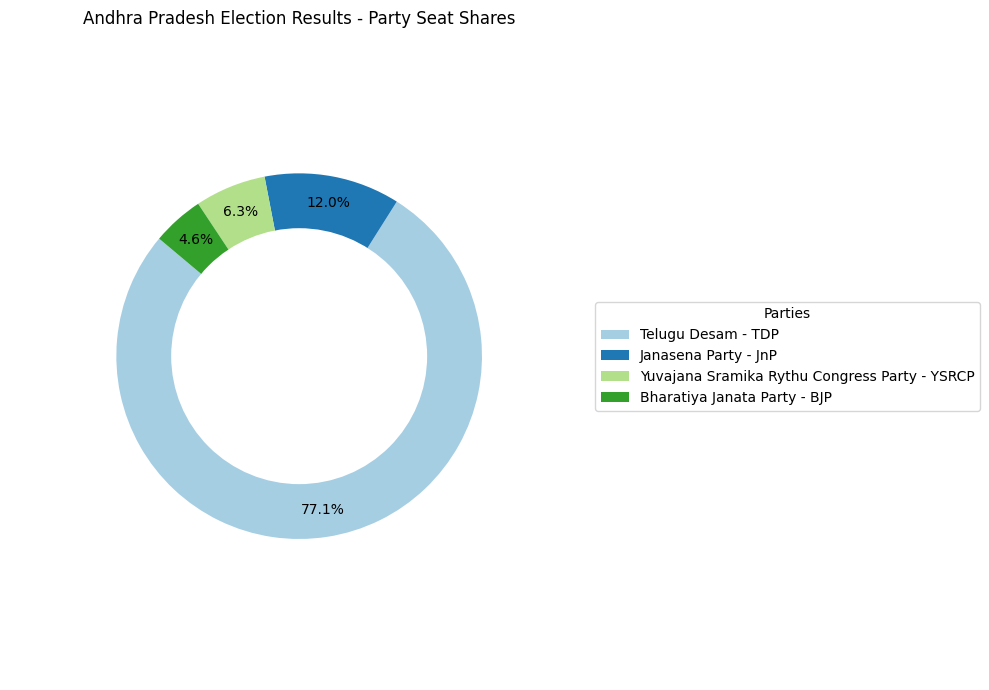

In [ ]:
# Data for plotting
data_ap = andhra_pradesh_results['Seat Share (%)']
parties_ap = andhra_pradesh_results['Party']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 7))

# Plot
wedges, texts, autotexts = ax.pie(data_ap, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired(range(len(parties_ap))))

# Draw center circle for donut shape (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a legend with the party names
plt.legend(wedges, parties_ap, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Andhra Pradesh Election Results - Party Seat Shares")
plt.tight_layout()

# Display the chart
plt.show()

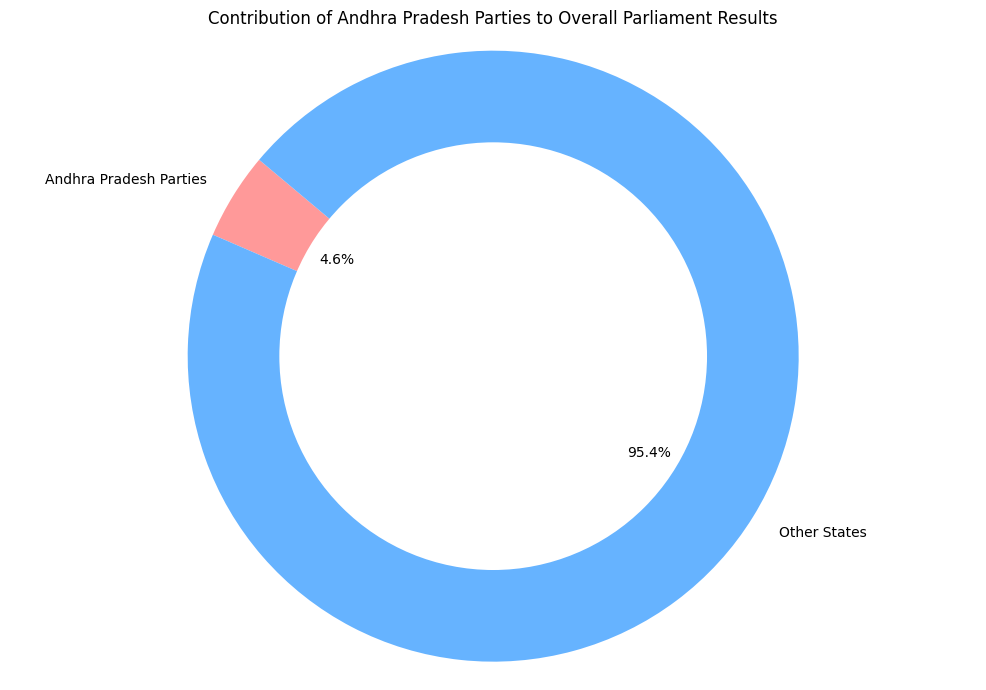

In [ ]:


# Load the data from the CSV files
andhra_parliament_results = pd.read_csv('/content/AndhraPradesh_Parliament_election_results.csv')


# Sum of seats for Andhra Pradesh parties in Parliament
andhra_total_seats_parliament = andhra_parliament_results['Total'].sum()

# Sum of seats for all parties in Parliament
total_seats_parliament = parliament_results['Total'].sum()

# Calculate the seat share of Andhra Pradesh parties in Parliament
andhra_seat_share_parliament = (andhra_total_seats_parliament / total_seats_parliament) * 100

# Calculate the seat share of Other States in Parliament
other_states_seat_share_parliament = 100 - andhra_seat_share_parliament

# Data for plotting
data = [andhra_seat_share_parliament, other_states_seat_share_parliament]
labels = ['Andhra Pradesh Parties', 'Other States']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 7))

# Plot
wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

# Draw center circle for donut shape (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title("Contribution of Andhra Pradesh Parties to Overall Parliament Results")
plt.tight_layout()

# Display the chart
plt.show()


##Odisha

In [ ]:
# Load the data from the CSV file
odisha_results = pd.read_csv('/content/Odisha_election_results.csv')

In [ ]:
odisha_results

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,78,0,78
1,Biju Janata Dal - BJD,51,0,51
2,Indian National Congress - INC,14,0,14
3,Communist Party of India (Marxist) - CPI(M),1,0,1
4,Independent - IND,3,0,3


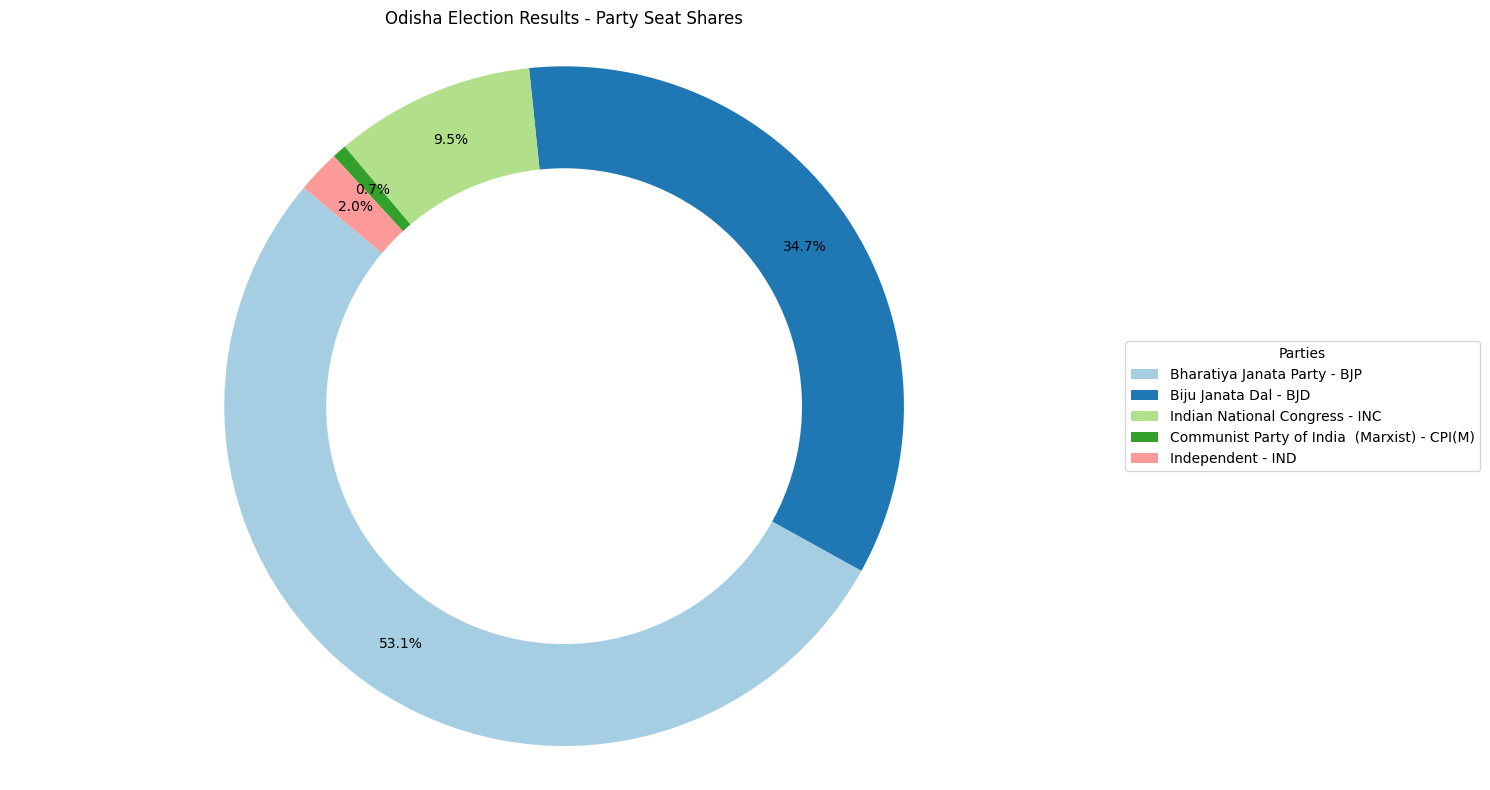

In [ ]:
# Odisha Election Results Analysis
total_seats_odisha = odisha_results['Total'].sum()
odisha_results['Seat Share (%)'] = (odisha_results['Total'] / total_seats_odisha) * 100
# Data for plotting
data_odisha = odisha_results['Seat Share (%)']
parties_odisha = odisha_results['Party']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(15, 8))

# Plot
wedges, texts, autotexts = ax.pie(data_odisha, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired(range(len(parties_odisha))))

# Draw center circle for donut shape (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a legend with the party names
plt.legend(wedges, parties_odisha, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Odisha Election Results - Party Seat Shares")
plt.tight_layout()

# Display the chart
plt.show()

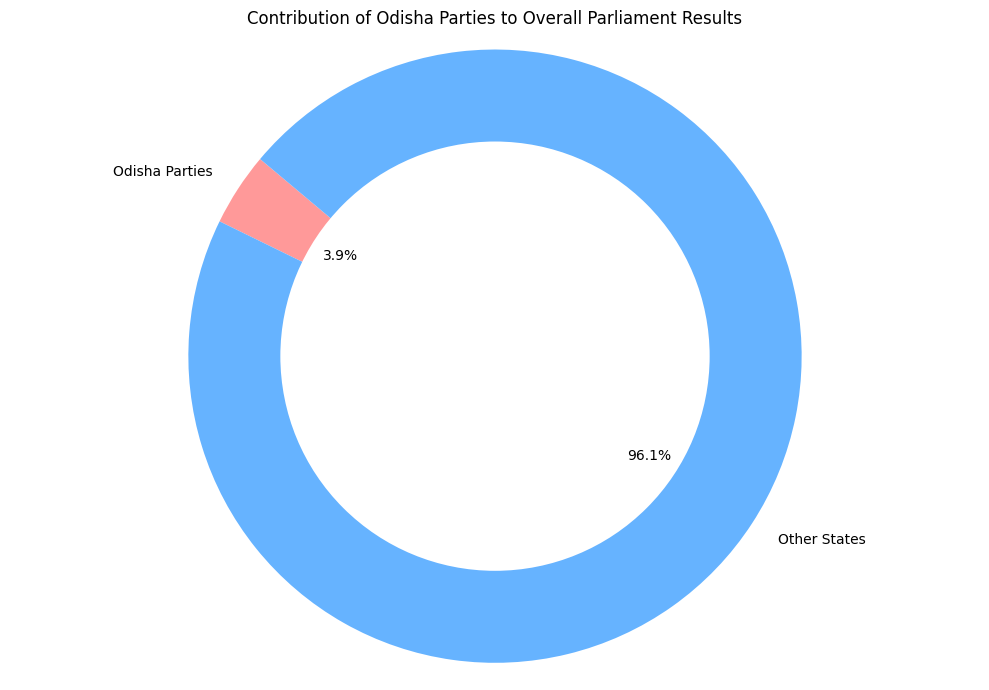

In [ ]:
odisha_parliament_results = pd.read_csv('/content/Odisha_Parliament_election_results.csv')

# Sum of seats for Odisha parties in Parliament
odisha_total_seats_parliament = odisha_parliament_results['Total'].sum()

# Sum of seats for all parties in Parliament
total_seats_parliament = parliament_results['Total'].sum()

# Calculate the seat share of Odisha parties in Parliament
odisha_seat_share_parliament = (odisha_total_seats_parliament / total_seats_parliament) * 100

# Calculate the seat share of Other States in Parliament
other_states_seat_share_parliament = 100 - odisha_seat_share_parliament

# Data for plotting
data = [odisha_seat_share_parliament, other_states_seat_share_parliament]
labels = ['Odisha Parties', 'Other States']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 7))

# Plot
wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

# Draw center circle for donut shape (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title("Contribution of Odisha Parties to Overall Parliament Results")
plt.tight_layout()

# Display the chart
plt.show()

#Arunachal Pradesh

In [ ]:
# Load the data from the CSV file
arunachal_results = pd.read_csv('/content/ArunachalPradesh_election_results.csv')

In [ ]:
arunachal_results

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,46,0,46
1,National People's Party - NPEP,5,0,5
2,Nationalist Congress Party - NCP,3,0,3
3,People's Party of Arunachal - PPA,2,0,2
4,Indian National Congress - INC,1,0,1
5,Independent - IND,3,0,3


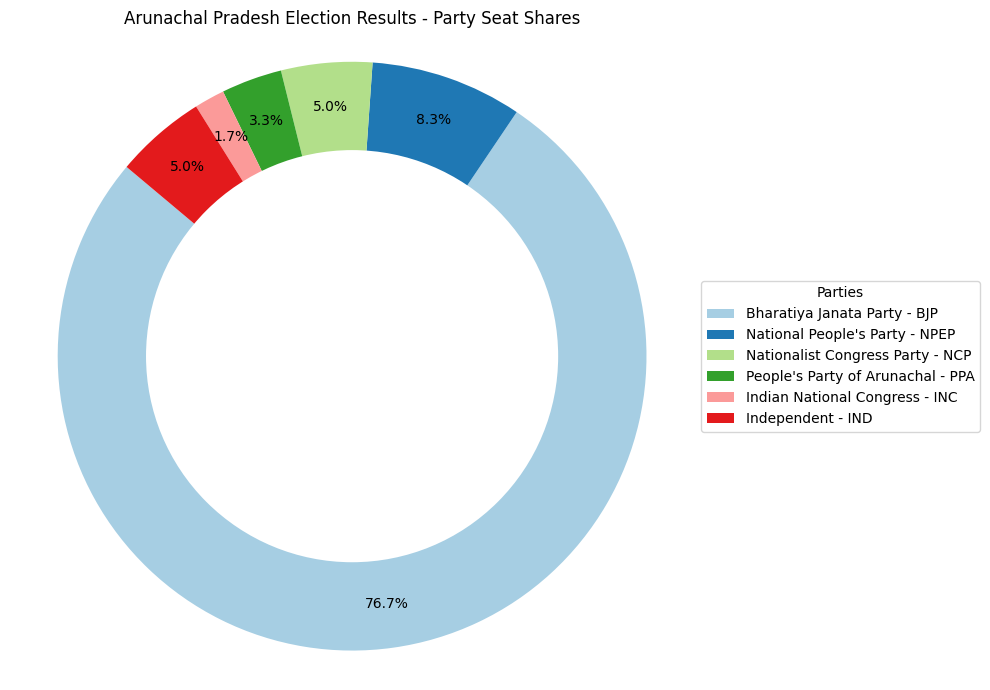

In [ ]:
# Arunachal Pradesh Election Results Analysis
total_seats_arunachal = arunachal_results['Total'].sum()
arunachal_results['Seat Share (%)'] = (arunachal_results['Total'] / total_seats_arunachal) * 100

# Data for plotting
data_arunachal = arunachal_results['Seat Share (%)']
parties_arunachal = arunachal_results['Party']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 7))

# Plot
wedges, texts, autotexts = ax.pie(data_arunachal, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired(range(len(parties_arunachal))))

# Draw center circle for donut shape (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a legend with the party names
plt.legend(wedges, parties_arunachal, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Arunachal Pradesh Election Results - Party Seat Shares")
plt.tight_layout()

# Display the chart
plt.show()

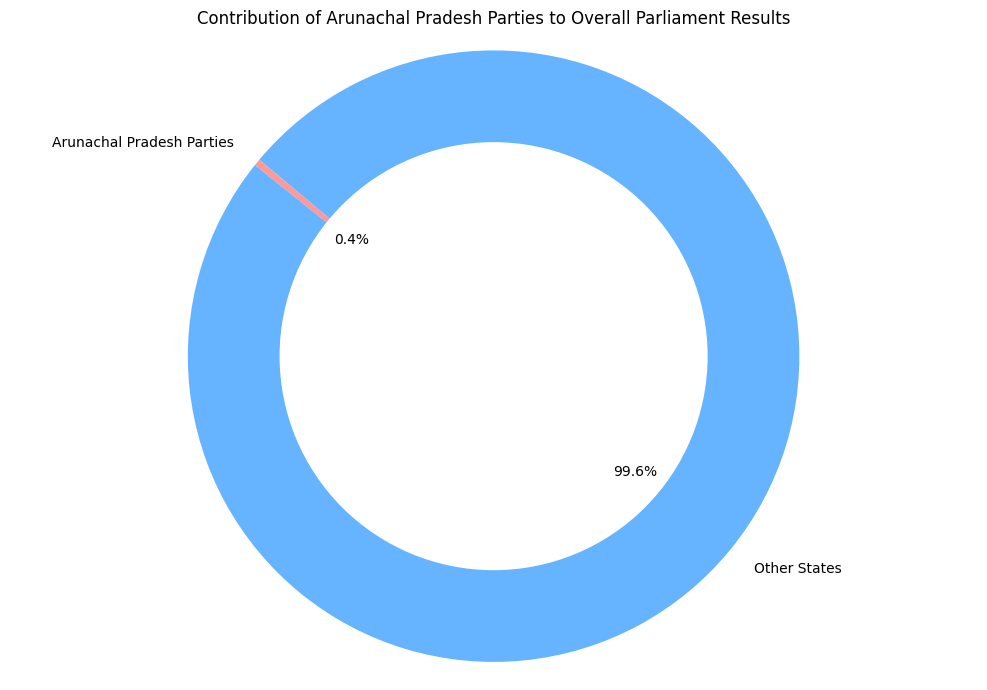

In [ ]:
arunachal_pradesh_parliament_results = pd.read_csv('/content/ArunachalPradesh_Parliament_election_results.csv')

# Sum of seats for Arunachal Pradesh parties in Parliament
arunachal_total_seats_parliament = arunachal_pradesh_parliament_results['Total'].sum()

# Sum of seats for all parties in Parliament
total_seats_parliament = parliament_results['Total'].sum()

# Calculate the seat share of Arunachal Pradesh parties in Parliament
arunachal_seat_share_parliament = (arunachal_total_seats_parliament / total_seats_parliament) * 100

# Calculate the seat share of Other States in Parliament
other_states_seat_share_parliament = 100 - arunachal_seat_share_parliament

# Data for plotting
data = [arunachal_seat_share_parliament, other_states_seat_share_parliament]
labels = ['Arunachal Pradesh Parties', 'Other States']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 7))

# Plot
wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

# Draw center circle for donut shape (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title("Contribution of Arunachal Pradesh Parties to Overall Parliament Results")
plt.tight_layout()

# Display the chart
plt.show()

##Sikkim

In [ ]:
# Load the data from the CSV file
sikkim_results = pd.read_csv('/content/Sikkim_election_results.csv')
sikkim_results

,Party,Won,Leading,Total
0,Sikkim Krantikari Morcha - SKM,31,0,31
1,Sikkim Democratic Front - SDF,1,0,1


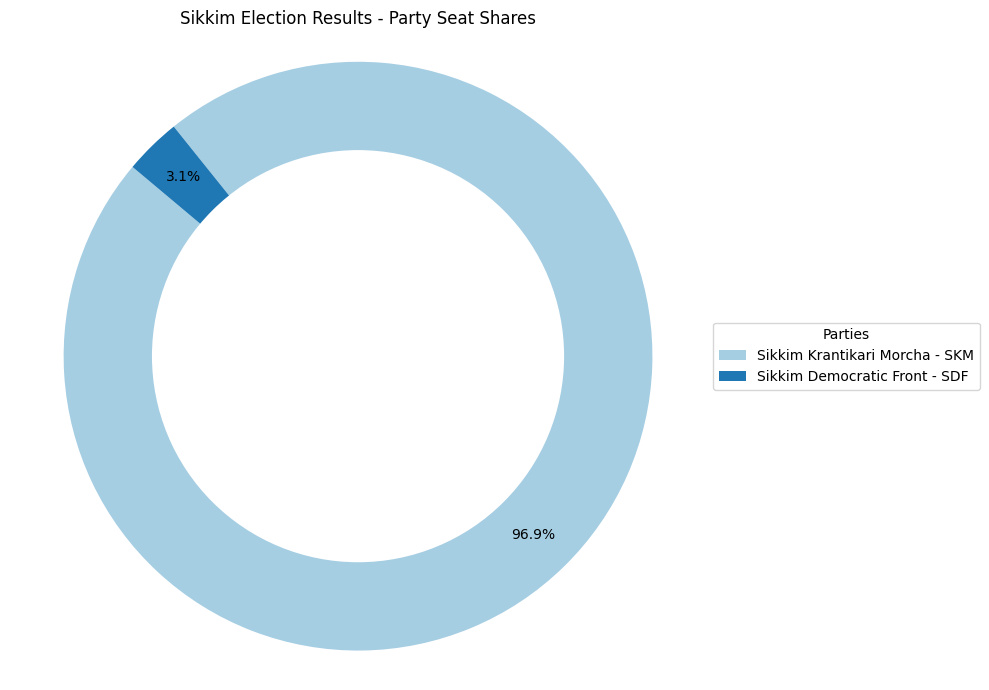

In [ ]:
# Sikkim Election Results Analysis
total_seats_sikkim = sikkim_results['Total'].sum()
sikkim_results['Seat Share (%)'] = (sikkim_results['Total'] / total_seats_sikkim) * 100

# Data for plotting
data_sikkim = sikkim_results['Seat Share (%)']
parties_sikkim = sikkim_results['Party']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 7))

# Plot
wedges, texts, autotexts = ax.pie(data_sikkim, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired(range(len(parties_sikkim))))

# Draw center circle for donut shape (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a legend with the party names
plt.legend(wedges, parties_sikkim, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Sikkim Election Results - Party Seat Shares")
plt.tight_layout()

# Display the chart
plt.show()

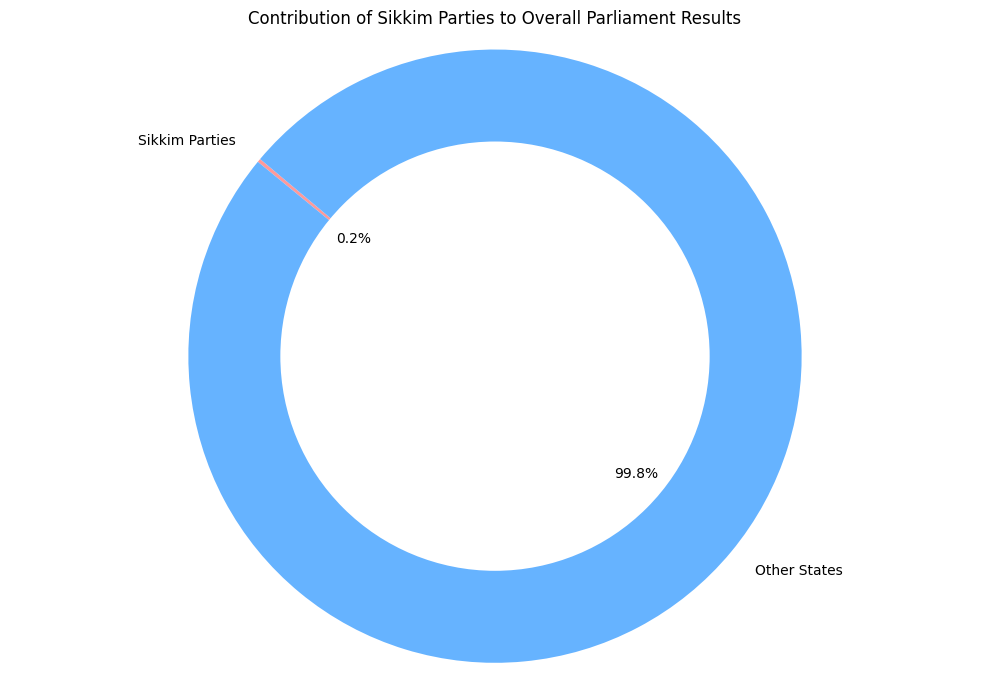

In [ ]:
sikkim_parliament_results = pd.read_csv('/content/Sikkim_Parliament_election_results.csv')

# Sum of seats for Sikkim parties in Parliament
sikkim_total_seats_parliament = sikkim_parliament_results['Total'].sum()

# Sum of seats for all parties in Parliament
total_seats_parliament = parliament_results['Total'].sum()

# Calculate the seat share of Sikkim parties in Parliament
sikkim_seat_share_parliament = (sikkim_total_seats_parliament / total_seats_parliament) * 100

# Calculate the seat share of Other States in Parliament
other_states_seat_share_parliament = 100 - sikkim_seat_share_parliament

# Data for plotting
data = [sikkim_seat_share_parliament, other_states_seat_share_parliament]
labels = ['Sikkim Parties', 'Other States']

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 7))

# Plot
wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

# Draw center circle for donut shape (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title("Contribution of Sikkim Parties to Overall Parliament Results")
plt.tight_layout()

# Display the chart
plt.show()

In [ ]:

# Dictionary of file paths for each state's parliament election results
state_files = {
    'Andhra Pradesh': '/content/AndhraPradesh_Parliament_election_results.csv',
    'Odisha': '/content/Odisha_Parliament_election_results.csv',
    'Arunachal Pradesh': '/content/ArunachalPradesh_Parliament_election_results.csv',
    'Sikkim': '/content/Sikkim_Parliament_election_results.csv'
    # Add paths for other states as needed
}

# Initialize lists to store the data
states = []
seat_shares = []

# Total seats in the parliament
total_seats_parliament = parliament_results['Total'].sum()

# Calculate seat shares for each state
for state, file_path in state_files.items():
    state_results = pd.read_csv(file_path)
    state_total_seats = state_results['Total'].sum()
    state_seat_share = (state_total_seats / total_seats_parliament) * 100
    states.append(state)
    seat_shares.append(state_seat_share)

# Calculate the seat share of Other States in Parliament
other_states_seat_share = 100 - sum(seat_shares)
states.append('Other States')
seat_shares.append(other_states_seat_share)

# Data for plotting
data = seat_shares
labels = states

# Create the pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=data, hoverinfo='label+percent', textinfo='label', marker=dict(colors=plt.cm.Paired(range(len(labels)))))])

# Update the layout for better visualization
fig.update_layout(
    title="Contribution of Each State to Overall Parliament Results",
    legend_title="States",
    legend=dict(yanchor="top", y=0.9, xanchor="left", x=1.05)
)

# Display the chart
fig.show()